# <font color='firebrick'> House Prices By Daniel Ifediba - Advanced Regression Techniques  <font>

### Predict sales prices and practice feature engineering, RFs, and gradient boosting

## <font color='goldenrod'>Introduction <front>

### <font color='black'> Problem Description <font>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 

### <font color='black'> Data Description <font>

Two types of dataset are provided: training set and test set. In fact, training data is the initial dataset you use to teach a machine learning application to recognize patterns or perform to your criteria, while testing data is used to evaluate your model’s accuracy and to make prediction as well. See [Data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) for full description. 

### <font color='black'> Goal <font>

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this project aims to predict the final price of each home. That's, for each Id in the test set, you want to predict the value of the SalePrice variable. 

### <font color='black'> Step-by-Step Procedure <font>

<font color='darkblue'> In order to tackle efficiently this project, we will follow the steps below suggested by [A. Qua](https://www.kaggle.com/adibouayjan). <front>
    
1.	Explarotory data analysis
    
    1.1. General exploration
        1.1.1 Loading Libraries
        1.1.2 Loading The Data Sets
        1.1.3 Checking For Missing Data

    1.2. Numerical features
        I.2.1. Explore and clean Numerical features        
    

2.	Feature engineering
    2.1. Features Distribution
    
    2.2. Dealing With Quasi-Constant Variables
        2.2.1. Feature Selection By Variance Threshold
        2.2.2. Feature Selection By Correlation
    

3.	Preparing data for modeling
    
    3.1. Splitting The Training Set Into Independent And Dependent Variables
    
    3.2. Split data into train and test and Standardization
        3.2.1. Split Data Into Train And Test Sets
        3.2.2. Split Data Into Train And Test Data Using Scaled Values


4.	Modeling

    4.1. Fiting Our Models Using The Non-Scaled Values

    4.2. Fitting Our Model Using The Scaled Values
         Ridge regression
         Lasso regression
         Decision Tree regression
         Random Forest regression

    4.3. Choosing The Best MOdel
        4.3.1. Calculate The R2 Score For Each Model

    4.4. Prediction on 'House Prices-Advanced Regression Techniques' For The test data set

## <font color='goldenrod'> 1. Exploratory Data Analysis <front>

These are the core parts of this session, according to [Pedro Marcelino, Ph.D.](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook): 
    
* Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
    
* Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
    
* Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
    
* Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    
* Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


### <font color='forestgreen'>  1.1. General Exploration <front>

#### 1.1.1. Loading libraries

In [1]:
import pandas as pd 

Pandas is a Python library for data analysis. Started by Wes McKinney in 2008 out of a need for a powerful and flexible quantitative analysis tool, pandas has grown into one of the most popular Python libraries. It has an extremely active community of contributors. 
Pandas features: 

* Times series Analysis
* Split-Apply-Combine
* Data visualisation
* Pivot Table
    
See [Pandas](https://mode.com/python-tutorial/libraries/pandas/) for more details. 

In [2]:
import matplotlib.pyplot as plt

Matplotlib is a python library used to create 2D graphs and plots by using python scripts. It has a module named pyplot which makes things easy for plotting by providing feature to control line styles, font properties, formatting axes etc. It supports a very wide variety of graphs and plots namely - histogram, bar charts, power spectra, error charts etc. 

See [Matplotlib](https://matplotlib.org) for more details. 

In [3]:
import seaborn as sns

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

See [Seaborn](https://seaborn.pydata.org) for more details. 

In [4]:
import numpy as np

NumPy brings the computational power of languages like C and Fortran to Python. With this power comes simplicity: a solution in NumPy is often clear and elegant.

See [NumPy](https://numpy.org) for more details. 

In [5]:
import warnings

Warnings are provided to warn the developer of situations that aren’t necessarily exceptions. Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc. A warning in a program is distinct from an error. Python program terminates immediately if an error occurs. 

Conversely, a warning is not critical. It shows some message, but the program runs. The warn() function defined in the ‘warning‘ module is used to show warning messages. The warning module is actually a subclass of Exception which is a built-in class in Python. 

See [Warning](https://docs.python.org/3/library/warnings.html) for more details. 

In [6]:
import statsmodels.api as sm #Cross-sectional models and methods.
import statsmodels.formula.api as smf #A convenience interface for specifying models using formula strings and DataFrames.

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

See [Statsmodels](https://www.statsmodels.org/stable/index.html) for more details. 

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [8]:
import sklearn

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

See [Sckit-learn](https://www.tutorialspoint.com/scikit_learn/index.htm) for more details. 

In [9]:
# Function to deal with missing values via imputation
from sklearn.impute import SimpleImputer

In [10]:
# Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
# Function to split data into different groups
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
import math

In [12]:
# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency

SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing. Like NumPy, SciPy is open source so we can use it freely. SciPy was created by NumPy's creator Travis Olliphant.

See [SciPy](https://scipy.org) for further details. 

In [13]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

#### 1.1.2. Loading the Data sets 

In [14]:
# Train set
df_train = pd.read_csv('train.csv')

# Printing the Training set
print(df_train)
 
# Checking the dimensions of this dataset
print(df_train.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [15]:
# Using f-string 
print(f"Train set shape: {df_train.shape} \n")

Train set shape: (1460, 81) 



In [16]:
# Test set
df_test = pd.read_csv('test.csv')
df_test0 = pd.read_csv('test.csv')

# Printing the Training set
#print(df_test)

# Checking the dimensions of this dataset
#print(df_test.shape)

#df_test.head()

In [17]:
# Using f-string 
print(f"Train set shape: {df_test.shape} \n")

Train set shape: (1459, 80) 



* Firstly, the training set and the test set have the same sample size. 

* Secondly, tt's worth noticing that the test set contains one veraible less than the training set. Obviously, we might suspect that this variable is "SalePrice" since our purpose is to predict its value based on the test set. Consequently, our training set is a lebeled one setting up a supervised learning framework. 

* Finally, the raw data displayed reveals that there are some quasi-constant Features: One of the values is dominant. No worries, we will certainly tackle this issue later on while processing numerical features. 

But at this point, let's check the second claim using the commands below.

In [18]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


#### 1.1.3. Checking for missing data

In [19]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
# info of each of the variables in our train set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

The main information arising from this output is that there are unfortunately some missing data in both sets including the training and the test samples, counted as null values. Fortunately, processing missing data is part of this preliminary work of the precedure stated right from the beginning. 

The chunk of instructions below is intended to cut the column relating to the house identifictaio off the training set and keep it aside. In fact, it's not a relevant feature needed to conduct the upcoming steps of the analysis. It's a designation variable we will use to present the final result as requested.   

In [21]:
# Drop the 'Id' column from the train set
df_train1 = df_train
df_train1.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
df_test1 = df_test
Id_test1_list = df_test1["Id"].tolist()
df_test1.drop(["Id"], axis=1, inplace=True)

### 1.2. Numerical Feature 

#### 1.2.1. Extracting Nnumerical features

The first address of this subsection is about isolating the culumns with numerical values from the whole training dataset. The lines of code underneath fulfill this task.  

In [22]:
df_train1 = df_train1.select_dtypes(exclude=["object"])
df_train1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Hence, we have 38 numerical independent variables all told in the training set. 

We can also use this alternative command leading to the same result. 

In [23]:
df_train2 = df_train1.select_dtypes(include=[np.number])
df_final = df_train2
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


We do the same thing with the test set. 

In [24]:
df_test2 = df_test1.select_dtypes(include=[np.number])
df_test2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


Hence, we have 36 numerical independent variables all told in the training set. 

## <font color='goldenrod'> 2 Feature Engineering <front>

### 2.1 Features distribution

While there are a number of distributional assumptions in regression models, one distribution that has no assumptions is that of any predictor (i.e. independent) variables.

However, it is sometime useful to understand the distribution of predictor variables to find influential outliers or concentrated values. Then, a highly skewed independent variable may be made more symmetric with a transformation. Then, it makes sense to think of a predictor as random. 

This is called Type II regression or Major Axis regression.

So let's look at the distribution of our two samples at hand. 

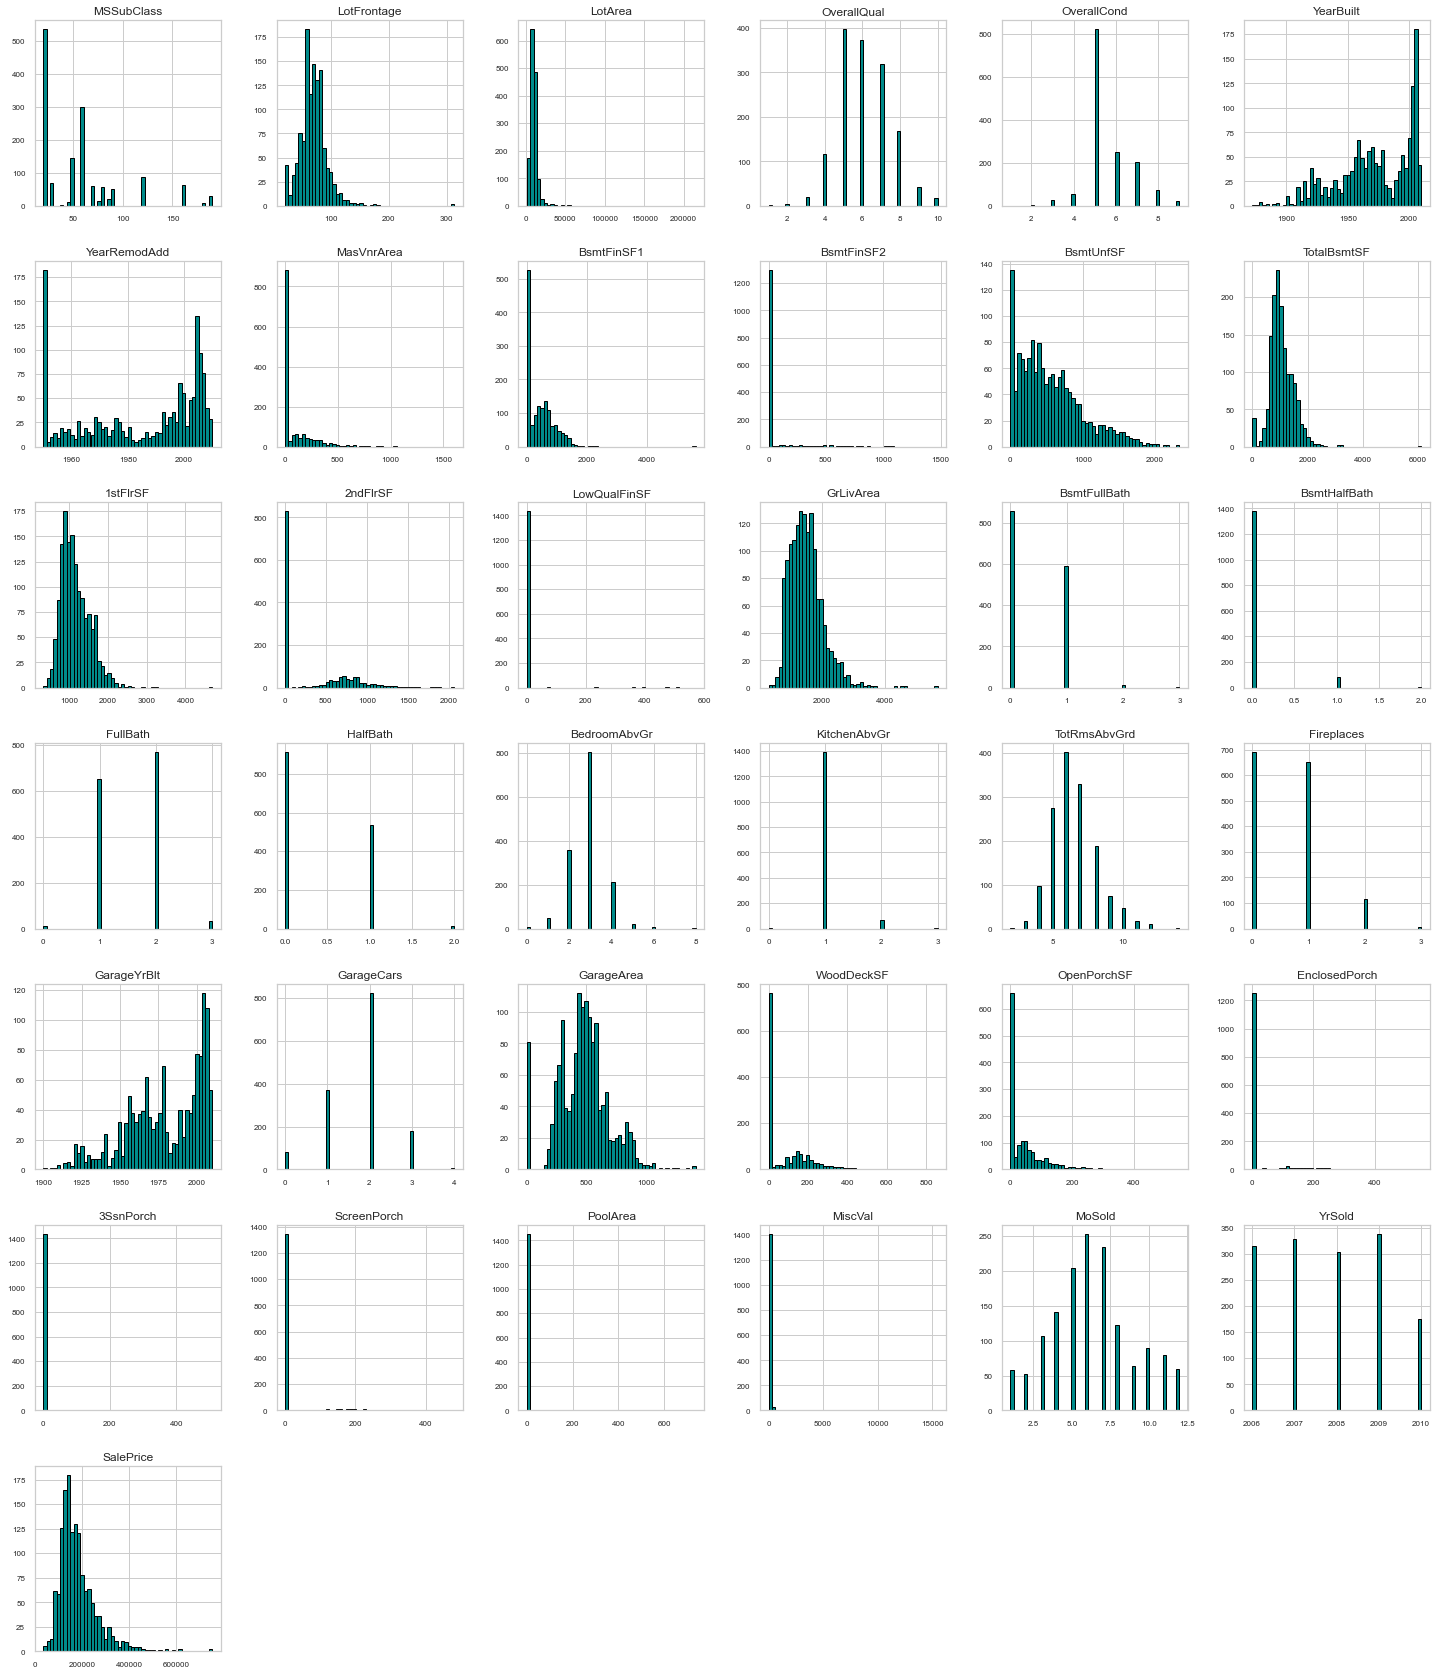

In [25]:
fig_ = df_final.hist(figsize=(25, 30), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

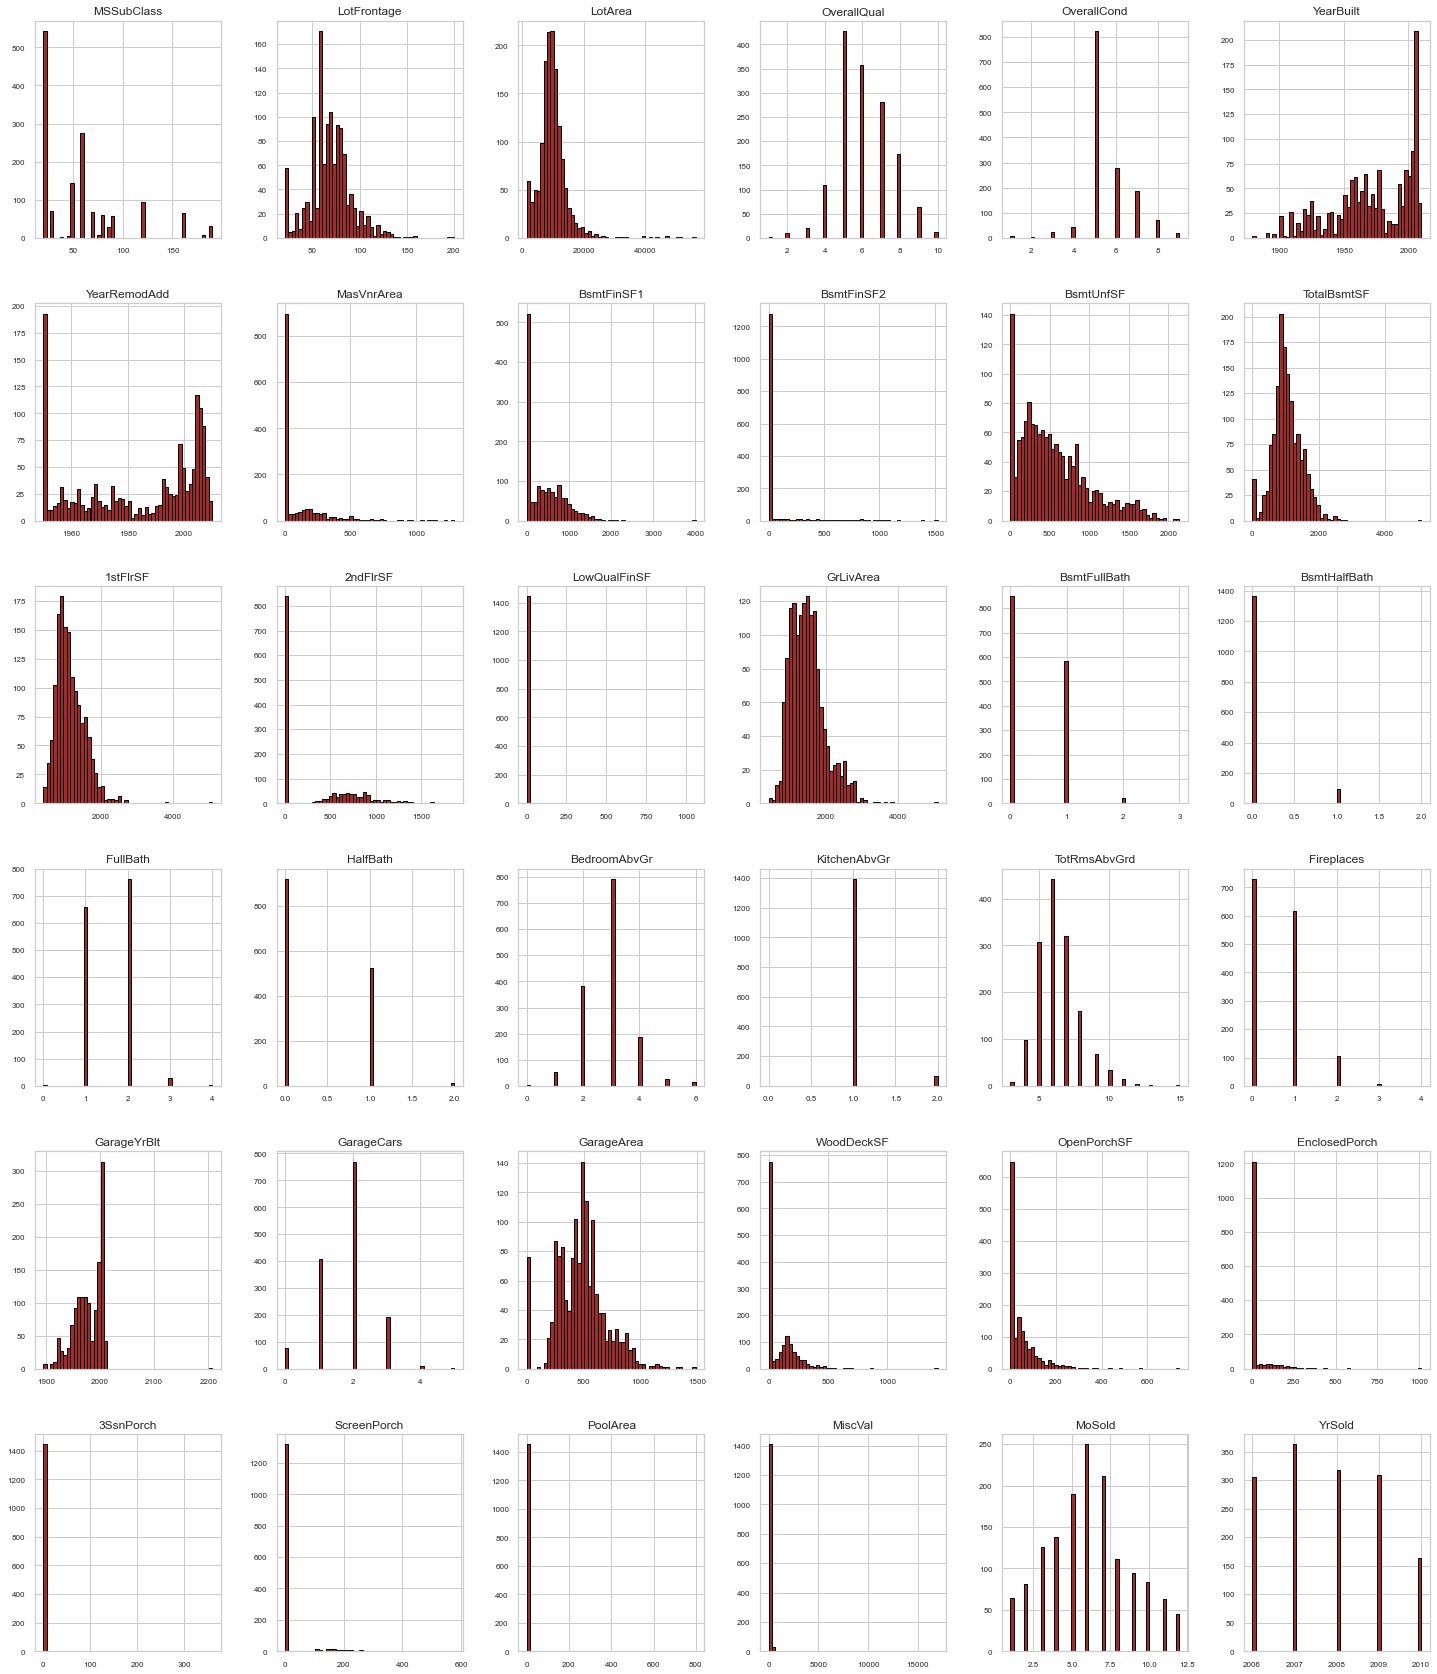

In [26]:
fig_ = df_test2.hist(figsize=(25, 30), bins=50, color="brown", edgecolor="black", xlabelsize=8, ylabelsize=8)

Without a shadow of doubt, we can assert that both samples of interest come from the same population. Sweet! 

### 2.2 Dealing With Quasi-Constant variables

From the latter window of distributions, it is clearly noticeable that some features have pervasive values. The models we are about to train won’t learn anything insightful by keeping this feature in training set. So we are better off dropping this feature.

Let's drop quasi-constant features where 95% of the values are similar or constant. Check out [sklearn.feature_selection.VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) for a better understanding of the process followed below. 

In [27]:
# Displaying a specific colunm
df_final[:]['KitchenAbvGr']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: KitchenAbvGr, Length: 1460, dtype: int64

#### 2.2.1 Feature Selection By Variance Threshold

On The Training Set

In [28]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_final.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_final.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_final.iloc[:, :-1].columns if x not in df_final.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_final.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [29]:
# Checking the dimensions of the set obtained
print(df_final.shape)

(1460, 36)


On The Test Set

In [30]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_test2.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test2.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test2.iloc[:, :-1].columns if x not in df_test2.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_test2.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 34

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [31]:
# Checking the dimensions of the set obtained
print(df_test2.shape)

(1459, 35)


#### 2.2.1.1. Scatterplot

A straightforward and widely used vizualisation technique for accessing the relationship between two or more variables is the scatterplot. 

In fact, scatterplots show possible associations or relationships between two variables. However, just because your graph or chart shows something is going on, it doesn’t mean that a cause-and-effect relationship exists. So we better be careful with how we interpret the graphs obtained.  

Furthermore, a scatterplot can be used to assess the following features of your dataset:

* Check for outliers and unusual observations.
* Create a time series plot with irregular time-dependent data.
* Evaluate the fit of a regression model.

In [32]:
# Extracting column names as a list
# cols = list (df_train_num.columns)
# cols

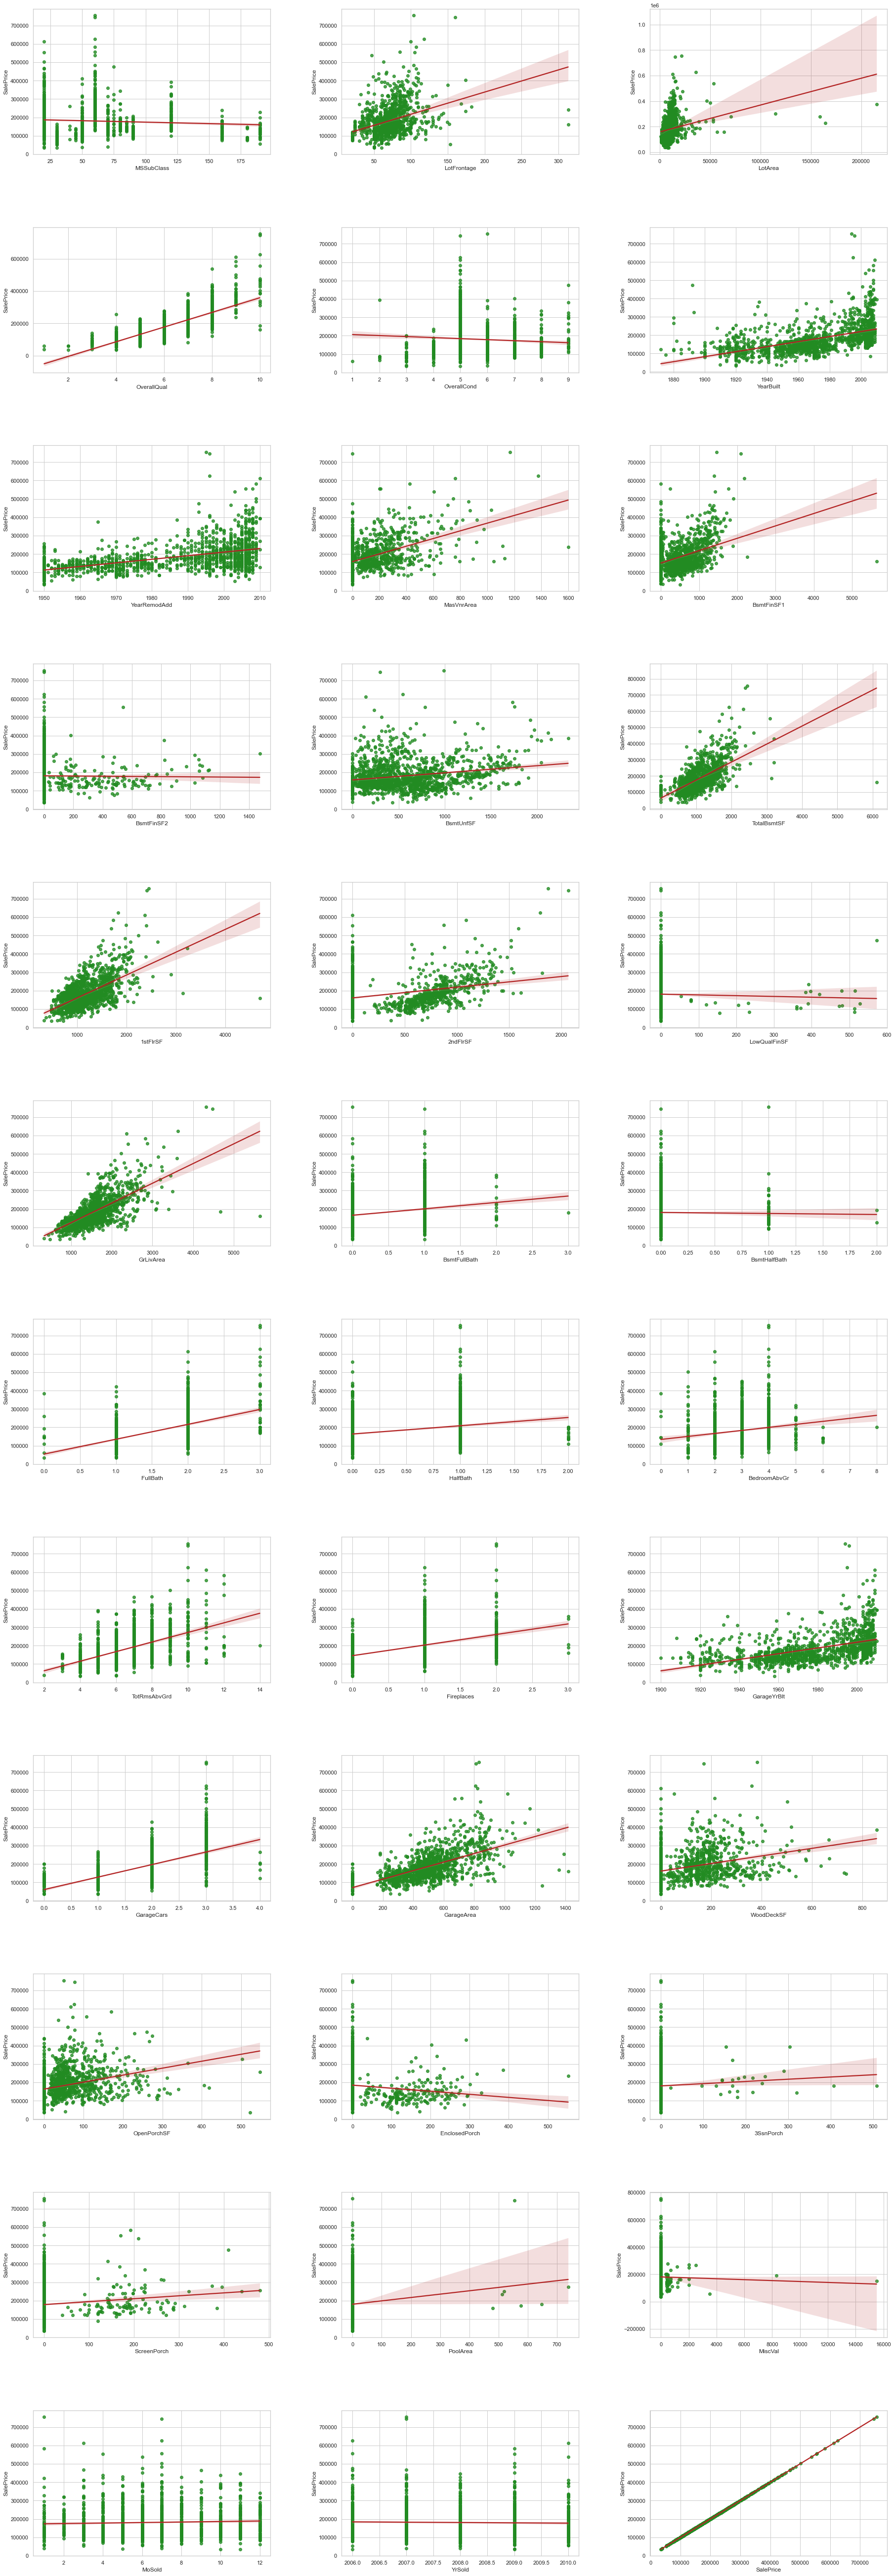

In [33]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_final.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_final, scatter_kws={"color": "forestgreen"}, line_kws={"color": "firebrick"})

#### Interpretation

##### Form and Direction


One pattern of special interest is a linear pattern, where the data has a general look of a line going uphill or downhill. The red line shown on each graph is the fitted line from a linear regression. 

A linear relationship between X and Y exists when the pattern of X and Y-values is heading alongside the red line, either uphill (with a positive slope or positive correlation) or downhill (with a negative slope or negative correlation).

So, looking at the preceding figure, we can see that a positive linear relationship appears between the sale price and each predictors. That is, as the value assigned to the predictor standing for the potential of the house increases, the sale price increases as well. 

Note that the scatterplot only suggests a linear relationship between the two sets of values. It does not suggest that an increase in the sale price is a consequence of an increase in the house potential.

##### Strengh

Another important component to a scatterplot is the strength of the relationship between the two variables. The slope provides information on the strength of the relationship.

* The strongest linear relationship occurs when the slope is 1. This means that when one variable increases by one, the other variable also increases by the same amount. This line is at a 45 degree angle.

* The strength of the relationship between two variables is a crucial piece of information. Relying on the interpretation of a scatterplot is too subjective. More precise evidence is needed, and this evidence is obtained by computing a coefficient that measures the strength of the relationship under investigation.

#### 2.2.2. Feature Selection By Correlation

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. 

##### Pearson's Correlation

It is a powerful tool to summarize a large dataset and to gauge how far the independent variables are linearly related to the target variable. So let's check this out.

In [34]:
df_train1['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [35]:
corr = df_final.corr()
corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


In [36]:
corr1 = df_test2.corr()
corr1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.450505,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.012186,-0.058775,-0.079093,...,-0.108000,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,0.011366,-0.008392
LotFrontage,-0.450505,1.000000,0.644608,0.182870,-0.092312,0.122356,0.092603,0.251533,0.204621,0.046824,...,0.375581,0.157426,0.179795,0.013340,-0.037487,0.113444,0.134232,0.068161,0.008810,-0.025263
LotArea,-0.359537,0.644608,1.000000,0.107989,-0.103402,0.048314,0.036907,0.188691,0.185470,0.054199,...,0.315841,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,0.005152,-0.051144
OverallQual,0.034690,0.182870,0.107989,1.000000,-0.095874,0.621910,0.591267,0.453991,0.322583,-0.028199,...,0.568161,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.008764,-0.012291
OverallCond,-0.071768,-0.092312,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.144261,-0.054720,0.043109,...,-0.156769,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,-0.009767,0.015649


<AxesSubplot:>

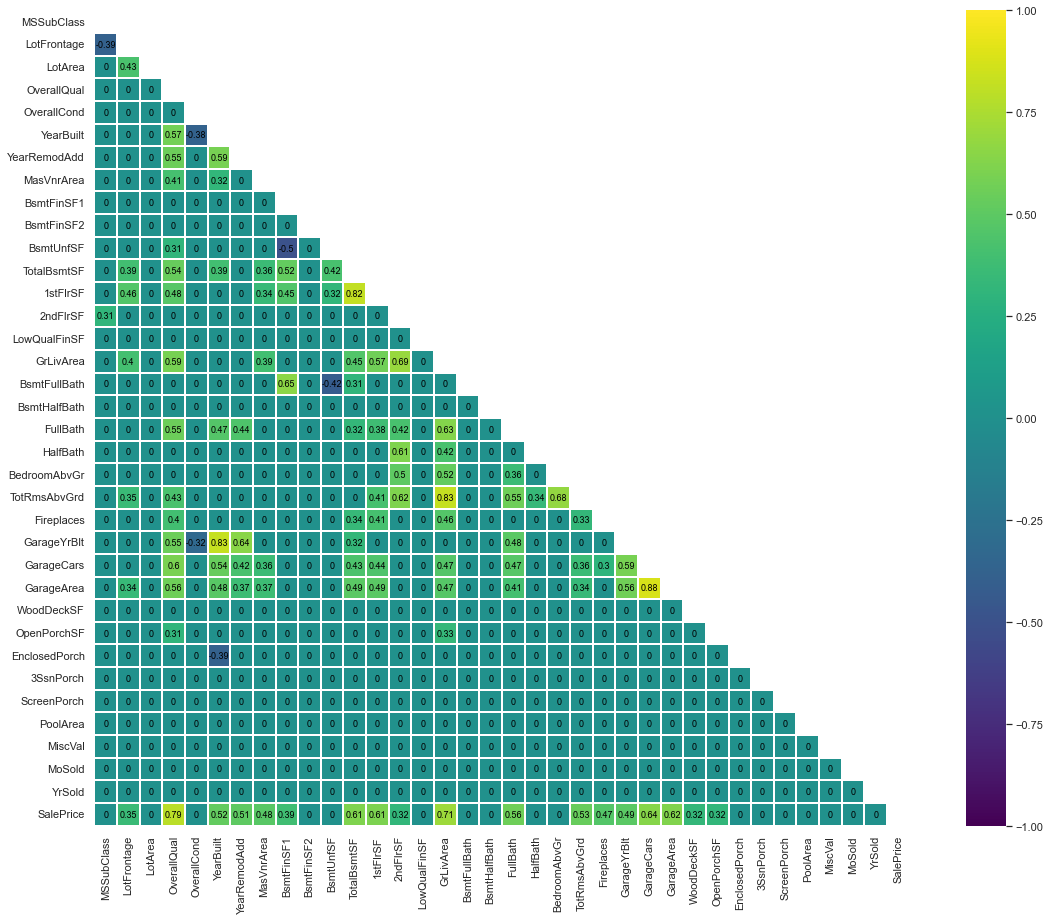

In [37]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_final.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

##### Strengh of relationship

* |r| < 0.3 $\Rightarrow$ None or Very Weak
* 0.3 < |r| < 0.5 $\Rightarrow$ Weak
* 0.5 < |r| < 0.7 $\Rightarrow$ Moderate
* |r| > 0.7 $\Rightarrow$ Strong

Correlation around 0.7 or above suggest a strong relationship and only one of the two variables is needed in the analysis. This need to be dealt with when adressing the features selection. 

Thus, we will look at two kinds of correlation: Those between the variable of interest and the predictors and those  within independent variables.

As a result, we can deduce that there is a strong linear relationship between the sale price, our target variable and predictors cited in a descent order: 

* The overall quality of the material used and the finished house, which is without a doubt of shadow obvious.
* The living area above grade or ground,

Also, 8 predictors are moderately correlated with the dependent variable. To mention only a few:

* The size of garage in car capacity, looks like people care a lot about their cars confort :),
* The size of garage which was predicatable based on the previous customers expectation,
* The total square feet of basement erea,
* The first floor square feet, 
* etc.

Finally, we are left with 8 weakly correlated predictors for a cut-off value equals 30% namely:

* Year garage was built,
* Masonry veneer area,
* Number of fireplaces,
* Type 1 finished,
* etc.

As for the second type of correlation we are interested in, we have a very strong positive correlation (of at least 0.7) including variable below also lined up in a descent order:

* "GarageArea" and "GarageCars" 
* "GarageYrBlt" and "YearBuilt" 
* "TotRmsAbvGrd" and "GrLivArea" 
* "1stFlrSF" and "TotalBsmtSF" 

We recall that:

* "GarageYrBlt" stands for the year the garage was build,
* "YearBuilt" is the original construction date,
* "TotRmsAbvGrd" is the total rooms above grade not including the bathrooms.

In [38]:
df_num_corr = df_final.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.7)
strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")


# Correlated features (0.3 < r2 < 0.5)
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

2 strongly correlated values with SalePrice:
OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64

8 moderately correlated values with SalePrice:
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 weakly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


This piece of code above yields a summary output in terms of numbers regarding our recent interpretation. 

Now, from the correlation heatmap above, we can see that there are features that a high relationship with each other, meaning that they have the same effects on our dependent variable. 
Hence we have to drop one of them. 
From the code below, we are looking to drop one of the features that have a correlation of over 0.7 betweeen one another

In [39]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

In [40]:
selected_columns = corr.columns[columns]
selected_columns.shape

(31,)

Using the ouput from the function above, we can then put the selected columns and its values into our dataframe, since we need it in our training set to run predictions.

In [41]:
df_final = df_final[selected_columns]

Now we add the `SalePrice` column back to the dataframe since it was removed during the feature selection using correlation.

In [42]:
df_train1['SalePrice'] = df_train1['SalePrice'].astype(int)
df_final['SalePrice'] = df_train1['SalePrice']

In [43]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [44]:
columns = np.full((corr1.shape[0],), True, dtype=bool)
for i in range(corr1.shape[0]):
    for j in range(i+1, corr1.shape[0]):
        if corr1.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

In [45]:
selected_columns1 = corr1.columns[columns]
selected_columns1.shape

(31,)

In [46]:
df_test2 = df_test2[selected_columns1]

##  <font color='goldenrod'>3. Preparing The Data For Modeling <front>

### 3.1. Spliting the training sets into independent and the dependent variables

The next thing we want to do is to split the dataset into independent and dependent variables (x and y), such that `x` is every other column excluding the `SalePrice` and `y` is the `SalePrice` alone. 

In [55]:
y = df_final[:len(df_final)][['SalePrice']] # dependent variable
x = df_final[:len(df_final)].drop('SalePrice', axis = 1) # independent variables(our predictive variables)
x = x.fillna(0)

Now lets see the features to know if out code was accurate in the split

In [56]:
x.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,2,0,61,0,0,0,0,0,2,2008
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,2,298,0,0,0,0,0,0,5,2007
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,2,0,42,0,0,0,0,0,9,2008
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,3,0,35,272,0,0,0,0,2,2006
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,3,192,84,0,0,0,0,0,12,2008


Also we check the dependent variable...

In [57]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### 3.2. Split Data Into Train & Test & Standardisation

#### 3.2.1 Split Data Into Train & Test

Next we split the dataset df_final using the test and train split method, with the non-scaled values; the reason we are doing this is to know our model outcome using both the scaled and non-scaled values of X

In [58]:
X_train, X_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state=42)

#### 3.2.2. Split data into train and test split using Standardisation
Now, viewing our box plots above, we can see that there are alot of outliers in some features of our dataset. Ife we are to perform most of regression processes like that, we will find the outcome to be inconsistent, thus we want to reduce the number of outliers by scaling the values in our features between `0 and 1`.
We do not need to standardise the 'y' for both the train and test sets, since it is what we are trying to predict.
Now we want to split our data set using the scaled values

In [59]:
# create scaler object
x = x.fillna(0)
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(x)

# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=x.columns)
X_standardise.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.07,0.21,-0.21,0.65,-0.52,1.05,0.88,0.51,0.58,-0.29,...,0.31,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14
1,-0.87,0.65,-0.09,-0.07,2.18,0.16,-0.43,-0.57,1.17,-0.29,...,0.31,1.63,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-0.49,-0.61
2,0.07,0.30,0.07,0.65,-0.52,0.98,0.83,0.33,0.09,-0.29,...,0.31,-0.75,-0.07,-0.36,-0.12,-0.27,-0.07,-0.09,0.99,0.14
3,0.31,0.07,-0.10,0.65,-0.52,-1.86,-0.72,-0.57,-0.50,-0.29,...,1.65,-0.75,-0.18,4.09,-0.12,-0.27,-0.07,-0.09,-1.60,-1.37
4,0.07,0.76,0.38,1.37,-0.52,0.95,0.73,1.37,0.46,-0.29,...,1.65,0.78,0.56,-0.36,-0.12,-0.27,-0.07,-0.09,2.10,0.14


In [60]:
# Test / Train split for scaled data
X_train1, X_test1, y_train1, y_test1 = tts(X_scaled, y, test_size=0.2, random_state=42)

# <font color='goldenrod'>4. Modeling <front>
The next thing we do is to bring in all the regression models we which to build and assign them a variable name so we can easily call on them when we wish to use them.

### 4.1. Fitting Our Models Using The Non-Scaled Values
In the cell below, we then fit each model into our train set to know the outcome

In [61]:
#Linear Regression model
linear=LinearRegression()

#Lasso Regression model
lasso = Lasso(alpha=0.01)

#Ridge regression model
ridge = Ridge()

#regression tree model
regr_tree = DecisionTreeRegressor(max_depth=5,random_state=42)

#Support vector machine model
s=SVR(kernel='rbf', gamma=0.1, C=1000)

#random forest regression model
RF = RandomForestRegressor(oob_score= True, n_estimators= 300, min_samples_leaf= 1, max_features= 0.9)

In [62]:
#Train the linear model
linear.fit(X_train, y_train)
linear_prediction = linear.predict(X_test)

#Train the lasso model
lasso.fit(X_train, y_train)
lasso_prediction = lasso.predict(X_test)

# Train the RIDGE model
ridge.fit(X_train, y_train)
ridge_prediction = ridge.predict(X_test)

#Decision tree model
regr_tree.fit(X_train,y_train)
regre_tree_prediction=regr_tree.predict(X_test)
'''
#support vector model
sv_reg.fit(X_train,y_train)
sv_reg_prediction=sv_reg.predict(X_test)
'''
#support vector model
s.fit(X_train,y_train)
s_reg_prediction=s.predict(X_test)
'''
#Parameter-tuned SVR model
param_grid={'C':[1*(10**i) for i in range(-1,4)],'gamma': [1/(10**i) for i in range(0,5)], 'kernel': ['rbf']}
param_grid_tuned=GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
param_grid_tuned.fit(X_train,y_train)
param_grid_prediction=param_grid_tuned.predict(X_test)
'''


RF.fit(X_train,y_train)
RF_prediction=RF.predict(X_test)

Next we are going to print out the intercept and coefficient for the linear regression

In [63]:
# extract MLR model intercept
intercept_linear = float(linear.intercept_)

In [64]:
print("Intercept of Linear Model:", intercept_linear)

Intercept of Linear Model: 283877.30316292203


In [65]:
# extract model coeffs
linear.coef_

array([[-1.98555732e+02, -6.69864270e+00,  4.03209128e-01,
         1.87041881e+04,  3.75975182e+03,  3.06517408e+02,
         2.31938968e+02,  2.41028963e+01,  8.01567962e+00,
        -3.26792913e+00, -2.95945925e-01,  4.45180457e+00,
         2.48961128e+00,  6.99342285e-01,  5.18228030e+01,
         1.15622173e+04, -1.38851828e+03,  3.51253109e+03,
        -2.03371474e+03, -6.00187687e+03,  4.67839493e+03,
         1.16072500e+04,  2.54820061e+01, -5.17949264e+00,
         5.43398301e+00,  3.44769605e+01,  6.34886644e+01,
        -3.94433970e+01, -4.22598810e-01, -2.41806927e+02,
        -6.98847731e+02]])

We are going to then build a function that calculates the RMSE for each of our regression models and then print out their values.

In [66]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [67]:
print('These are our predictions using the non-scaled values of our dataset')
print()
print(f'Linear Model:  {rmse(y_test, linear_prediction)}')
print(f'lasso Model:  {rmse(y_test, lasso_prediction)}')
print(f'Ridge Model:  {rmse(y_test, ridge_prediction)}')
print(f'Decision Tree:  {rmse(y_test, regre_tree_prediction)}')
print(f'SVG:  {rmse(y_test, s_reg_prediction)}')
print(f'Random forest:  {rmse(y_test, RF_prediction)}')

These are our predictions using the non-scaled values of our dataset

Linear Model:  36806.14046485698
lasso Model:  36806.13331764502
Ridge Model:  36801.27477177901
Decision Tree:  38254.93818557024
SVG:  88672.90931059158
Random forest:  28461.8026000826


### 4.2. Fitting The Model Using The Scaled Values
In the cell below, we then fit each model into our train set to know the outcome

In [68]:
#Train the linear model
linear.fit(X_train1, y_train1)
linear_prediction = linear.predict(X_test1)

#Train the lasso model
lasso.fit(X_train1, y_train1)
lasso_prediction = lasso.predict(X_test1)

# Train the RIDGE model
ridge.fit(X_train1, y_train1)
ridge_prediction = ridge.predict(X_test1)

#Decision tree model
regr_tree.fit(X_train1, y_train1)
regre_tree_prediction=regr_tree.predict(X_test1)
'''
#support vector model
sv_reg.fit(X_train,y_train)
sv_reg_prediction=sv_reg.predict(X_test)
'''
#support vector model
s.fit(X_train1, y_train1)
s_reg_prediction=s.predict(X_test1)
'''
#Parameter-tuned SVR model
param_grid={'C':[1*(10**i) for i in range(-1,4)],'gamma': [1/(10**i) for i in range(0,5)], 'kernel': ['rbf']}
param_grid_tuned=GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
param_grid_tuned.fit(X_train,y_train)
param_grid_prediction=param_grid_tuned.predict(X_test)
'''


RF.fit(X_train1, y_train1)
RF_prediction=RF.predict(X_test1)

We are going to then build a function that calculates the RMSE for each of our regression models and then print out their values.

In [69]:
def rmse(y_test1, y_predict):
    return np.sqrt(mean_squared_error(y_test1, y_predict))

In [70]:
print('These are our predictions using the scaled values of our dataset')
print()
print(f'Linear Model:  {rmse(y_test1, linear_prediction)}')
print(f'lasso Model:  {rmse(y_test1, lasso_prediction)}')
print(f'Ridge Model:  {rmse(y_test1, ridge_prediction)}')
print(f'Decision Tree:  {rmse(y_test1, regre_tree_prediction)}')
print(f'SVG:  {rmse(y_test1, s_reg_prediction)}')
print(f'Random forest:  {rmse(y_test1, RF_prediction)}')

These are our predictions using the scaled values of our dataset

Linear Model:  36803.18461554978
lasso Model:  36806.14119110418
Ridge Model:  36809.52024778922
Decision Tree:  38254.93818557024
SVG:  80886.27872291145
Random forest:  28157.82353652937


### 4.3. Choosing The Best Model

#### 4.3.1. Calculate The R2 Score
The next thing we want to do is to calculate the `r2 score` for each of our regression model, we are looking for the regression model that has the r2 closest to `1`, let's have a look below to see how that plays out.

In [71]:
print(f'Linear Model:  {r2_score(y_test1, linear_prediction)}')
print(f'lasso Model:  {r2_score(y_test1, lasso_prediction)}')
print(f'Ridge Model:  {r2_score(y_test1, ridge_prediction)}')
print(f'Decision Tree:  {r2_score(y_test1, regre_tree_prediction)}')
#print(f'SVG:  {r2_score(y_test, sv_reg_prediction)}')
print(f'SVG:  {r2_score(y_test1, s_reg_prediction)}')
#print(f'SVR_Tuned:  {r2_score(y_test, param_grid_prediction)}')
print(f'Random forest:  {r2_score(y_test1, RF_prediction)}')

Linear Model:  0.8234137165408829
lasso Model:  0.8233853433625621
Ridge Model:  0.8233529129956924
Decision Tree:  0.8092075544048505
SVG:  0.14702583580994433
Random forest:  0.8966324241110617


Next we plot a Barplot to visualize the performance of r2 score for each regression model.

Text(0.5, 1.0, 'Bar Chart showing the relative performance of regression models')

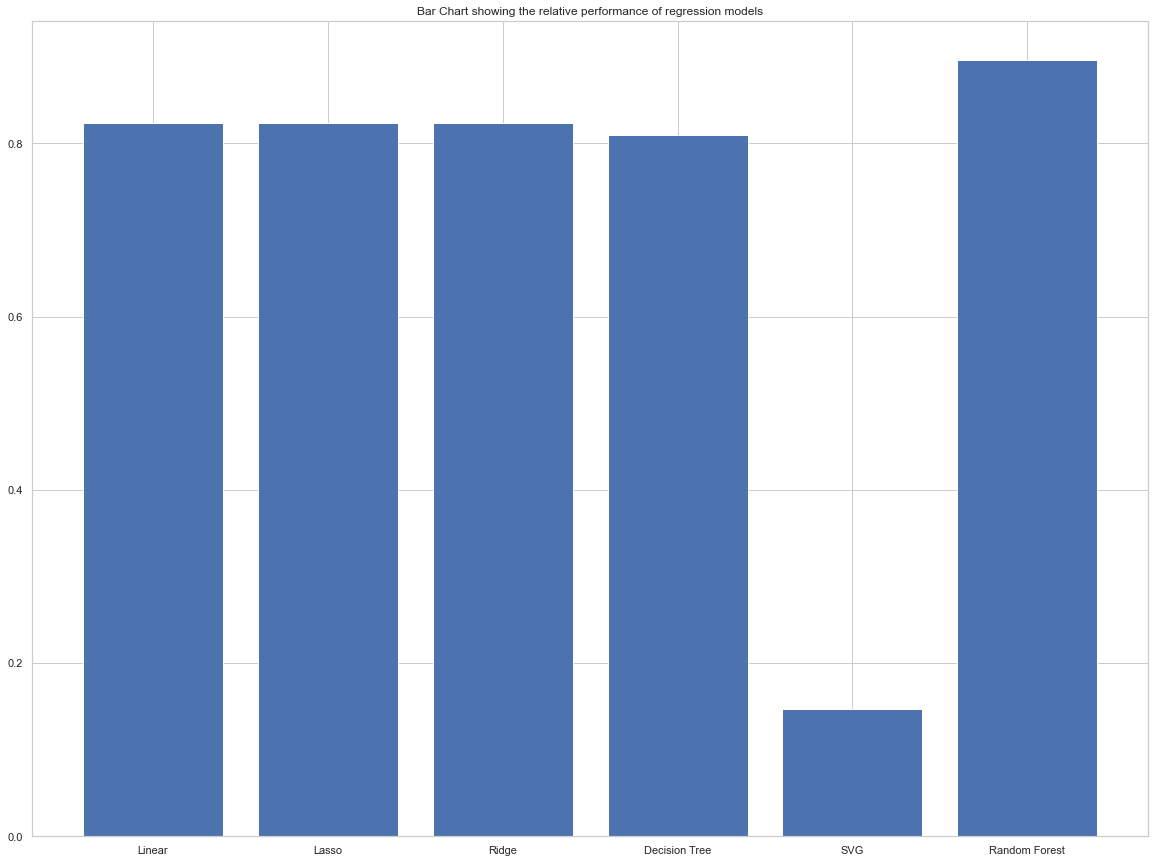

In [72]:
plt.bar(['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'SVG', 'Random Forest'],[r2_score(y_test1, linear_prediction),r2_score(y_test1, lasso_prediction),r2_score(y_test1, ridge_prediction),r2_score(y_test1, regre_tree_prediction), r2_score(y_test1, s_reg_prediction), r2_score(y_test1, RF_prediction)] )
plt.title("Bar Chart showing the relative performance of regression models")


We can see that the `Random Forest Model` performs best on our data, and gives us an r2 score closest to `1`, which only tells us that we should use it in predicting the values of the `SalePrice` on our test data

In [73]:
#The Random Forest model 
rf = RandomForestRegressor(n_estimators = 40, max_features = 0.5, min_samples_leaf=3, n_jobs = -1, oob_score=True)
rf.fit(X_train1,y_train1)

RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1, oob_score=True)

In [74]:
test_rf_predict = rf.predict(X_test1)
train_rf_predict = rf.predict(X_train1)

In [75]:
from sklearn import *
# RMSE for Random Forest model
math.sqrt(metrics.mean_squared_error(y_test1, test_rf_predict))

30143.218796319754

In [76]:
rf.score(X_test1, y_test1)

0.8815417213219133

RMSE for our Training Set

In [77]:
metrics.mean_squared_error(y_train1, train_rf_predict)

306172008.0895462

RMSE for our Test Set

In [78]:
metrics.mean_squared_error(y_test1, test_rf_predict)

908613639.4028045

Difference between the Training Set RMSE and The Test Set RMSE 

In [79]:
metrics.mean_squared_error(y_test1, test_rf_predict) - metrics.mean_squared_error(y_train1, train_rf_predict)

602441631.3132583

Now we want to create avisualization for our choosen model using the scatter plot and a lIne that shows us how fit our model is on our test data.

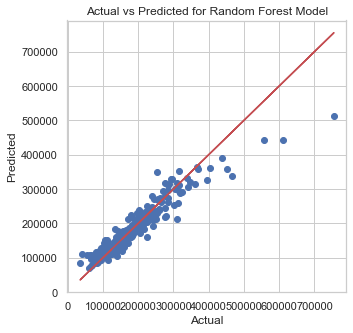

In [80]:
# Create figure of random forest model
f, ax = plt.subplots(figsize=(5,5))

ax.set_title('Actual vs Predicted for Random Forest Model')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test1,test_rf_predict)
ax.plot(y_test1,y_test1,'r')
plt.show()

As we can see on the scatter plot, our `Actual Values` ad `Predicted Values` are wrangled around the line of best fir showing us minimal error using the `Random Forest Model`

### 4.4 Prediction On House Prices For The Test Data

Standardize the test data

In [81]:

# create scaled version of the predictors (there is no need to scale the response)
X_scaled1 = scaler.fit_transform(df_test2)
test_data = pd.DataFrame(X_scaled1,columns=x.columns)
test_data = test_data.fillna(0)

Predict the values of our test data using the random forest model, since it is the regression model that gives us a r2 score closer to 1

In [82]:
prediction =  RF.predict(test_data)

In [83]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.87,0.51,0.36,-0.75,0.40,-0.34,-1.07,-0.57,0.06,0.52,...,-0.99,0.37,-0.70,-0.36,-0.09,1.82,-0.06,-0.09,-0.04,1.71
1,-0.87,0.56,0.90,-0.05,0.40,-0.44,-1.21,0.04,1.06,-0.30,...,-0.99,2.35,-0.18,-0.36,-0.09,-0.30,-0.06,19.73,-0.04,1.71
2,0.06,0.24,0.81,-0.75,-0.50,0.84,0.68,-0.57,0.77,-0.30,...,0.30,0.93,-0.21,-0.36,-0.09,-0.30,-0.06,-0.09,-1.14,1.71
3,0.06,0.42,0.03,-0.05,0.40,0.88,0.68,-0.45,0.36,-0.30,...,0.30,2.09,-0.18,-0.36,-0.09,-0.30,-0.06,-0.09,-0.04,1.71
4,1.47,-1.14,-0.97,1.34,-0.50,0.68,0.39,-0.57,-0.39,-0.30,...,0.30,-0.73,0.49,-0.36,-0.09,2.24,-0.06,-0.09,-1.88,1.71


Now we print out the predicted value for the sales price using the test data

In [84]:
daf = pd.DataFrame(prediction, columns = ['SalePrice'])
daf.head()

,SalePrice
0,"128,168.25"
1,"157,014.08"
2,"184,740.60"
3,"185,248.67"
4,"204,778.74"


Next we join the Id values from the original test data and match it to the sales value, then join both into a dataframe for the submission process

In [85]:
output = pd.DataFrame({'Id':df_test0['Id']})
submission = output.join(daf)
submission.to_csv('submission.csv', index = False)

In [86]:
len(test_data.columns)

31

In [87]:
submission.head()

,Id,SalePrice
0,1461,"128,168.25"
1,1462,"157,014.08"
2,1463,"184,740.60"
3,1464,"185,248.67"
4,1465,"204,778.74"
